In [20]:
import pandas as pd
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import textwrap

import matplotlib.pyplot as plt

K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [2]:
db = pd.read_csv("C:\\Users\\alexb\\Downloads\\qudditch_training.csv")#load_digits()#

X = db.drop(['id','player_id','quidditch_league_player','finbourgh_flick', 'double_eight_loop', 'snitchnip', ],axis=1)
X['move_speciality'] = np.nan_to_num(pd.to_numeric(X['move_speciality'], errors='coerce'))

Y = db['quidditch_league_player']

featureCount = len(X.columns)

print(featureCount)

42


In [3]:
def convert_x_to_vect(y):
    #print(y)
    y_vect = np.zeros((len(y), np.amax(y)+1))
    #y_vect = np.zeros(y.shape(), 1)
    for i in range(len(y)):
        #rint(y[i])
        y_vect[i, y[i]] = 1
    
    #print(y_vect)
    return y_vect.tolist()

In [4]:
indent = "\t\t"
wrapper = textwrap.TextWrapper(initial_indent=indent, subsequent_indent=indent)

In [5]:
print("Column\t Added\t Category")
i=0
for index in X.columns:
    if (X[index].dtype != object):
        
        print(str(i) + '/' + str(featureCount) + "\t " + "None\t " + X[index].name)
        print()
        i+=1
        
    elif(X[index].dtype == object):
        
        newCols = [X[index].name + '_' + s for s in X[index].astype('category').cat.categories.tolist()]
        
        print(str(i) + '/' + str(featureCount) + "\t " + "+" + str(len(newCols)) + " \t " + X[index].name)
        print(wrapper.fill(str(newCols)))
        print()
        i+=1
        
        X[index] = X[index].astype('category').cat.codes
        temp = convert_x_to_vect(X[index])
        P = pd.DataFrame(temp, columns = newCols)
        
        X = X.drop([index],axis=1)
        X = pd.concat([P, X], axis=1)
        
print("New # of Features: " + str(len(X.columns)))

Column	 Added	 Category
0/42	 +6 	 house
		['house_?', 'house_Gryffindor', 'house_Hufflepuff', 'house_Other',
		'house_Ravenclaw', 'house_Slytherin']

1/42	 +3 	 gender
		['gender_Female', 'gender_Male', 'gender_Unknown/Invalid']

2/42	 None	 age

3/42	 +10 	 weight
		['weight_>200', 'weight_?', 'weight_[0-25)', 'weight_[100-125)',
		'weight_[125-150)', 'weight_[150-175)', 'weight_[175-200)',
		'weight_[25-50)', 'weight_[50-75)', 'weight_[75-100)']

4/42	 None	 foul_type_id

5/42	 None	 game_move_id

6/42	 None	 penalty_id

7/42	 None	 game_duration

8/42	 +18 	 player_code
		['player_code_?', 'player_code_BC', 'player_code_CH',
		'player_code_CM', 'player_code_CP', 'player_code_DM',
		'player_code_FR', 'player_code_HM', 'player_code_MC',
		'player_code_MD', 'player_code_MP', 'player_code_OG',
		'player_code_OT', 'player_code_PO', 'player_code_SI',
		'player_code_SP', 'player_code_UN', 'player_code_WC']

9/42	 None	 move_speciality

10/42	 None	 num_game_moves

11/42	 None	 num_game_lo

In [6]:
Y = np.asarray(convert_x_to_vect(db['quidditch_league_player'].astype('category').cat.codes))
print(Y)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
print(X)

        snitch_caught_No  snitch_caught_Yes  change_Ch  change_No  \
0                    1.0                0.0        0.0        1.0   
1                    0.0                1.0        1.0        0.0   
2                    0.0                1.0        0.0        1.0   
3                    0.0                1.0        1.0        0.0   
4                    0.0                1.0        1.0        0.0   
5                    0.0                1.0        0.0        1.0   
6                    0.0                1.0        1.0        0.0   
7                    0.0                1.0        0.0        1.0   
8                    0.0                1.0        1.0        0.0   
9                    0.0                1.0        1.0        0.0   
10                   0.0                1.0        0.0        1.0   
11                   0.0                1.0        1.0        0.0   
12                   0.0                1.0        1.0        0.0   
13                   0.0          

In [8]:
# fix random seed for reproducibility
np.random.seed(0)
# create model
model = Sequential()
# Input
model.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu')) #Input layer
# Hidden
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(featureCount, activation='sigmoid'))
# Output
model.add(Dense(2, activation='sigmoid'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_2 (Dense)              (None, 120)               15960     
_________________________________________________________________
dense_3 (Dense)              (None, 42)                5082      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 86        
Total params: 38,684
Trainable params: 38,684
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, epochs=1500, batch_size=4603)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/1500
101266/101266 [==============================] - 1s 11us/step - loss: 0.2474 - acc: 0.5480
Epoch 2/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2417 - acc: 0.5734
Epoch 3/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2354 - acc: 0.5999
Epoch 4/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2337 - acc: 0.6081
Epoch 5/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2298 - acc: 0.6172
Epoch 6/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2282 - acc: 0.6220
Epoch 7/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2269 - acc: 0.6265
Epoch 8/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2266 - acc: 0.6274
Epoch 9/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2256 - acc: 0.6302
Epoch 10/1500
101266/101

101266/101266 [==============================] - 0s 3us/step - loss: 0.2099 - acc: 0.6645
Epoch 77/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2089 - acc: 0.6672
Epoch 78/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2098 - acc: 0.6646
Epoch 79/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2093 - acc: 0.6667
Epoch 80/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2083 - acc: 0.6688
Epoch 81/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2085 - acc: 0.6688
Epoch 82/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2083 - acc: 0.6677
Epoch 83/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2090 - acc: 0.6669
Epoch 84/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.2091 - acc: 0.6659
Epoch 85/1500
101266/101266 [==============================] - 0s 3us/step - l

101266/101266 [==============================] - 0s 3us/step - loss: 0.1911 - acc: 0.7074
Epoch 155/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1924 - acc: 0.7038
Epoch 156/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1896 - acc: 0.7114
Epoch 157/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1926 - acc: 0.7034
Epoch 158/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1898 - acc: 0.7102
Epoch 159/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1913 - acc: 0.7068
Epoch 160/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1914 - acc: 0.7071
Epoch 161/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1888 - acc: 0.7141
Epoch 162/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1896 - acc: 0.7111
Epoch 163/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1683 - acc: 0.7557
Epoch 233/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1687 - acc: 0.7546
Epoch 234/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1684 - acc: 0.7550
Epoch 235/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1688 - acc: 0.7547
Epoch 236/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1667 - acc: 0.7591
Epoch 237/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1693 - acc: 0.7527
Epoch 238/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1681 - acc: 0.7543
Epoch 239/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1653 - acc: 0.7619
Epoch 240/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1647 - acc: 0.7632
Epoch 241/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1473 - acc: 0.7989
Epoch 311/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1488 - acc: 0.7944
Epoch 312/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1489 - acc: 0.7948
Epoch 313/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1477 - acc: 0.7977
Epoch 314/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1464 - acc: 0.8003
Epoch 315/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1470 - acc: 0.7987
Epoch 316/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1479 - acc: 0.7971
Epoch 317/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1467 - acc: 0.7991
Epoch 318/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1453 - acc: 0.8014
Epoch 319/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1328 - acc: 0.8263
Epoch 388/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1355 - acc: 0.8193
Epoch 389/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1363 - acc: 0.8173
Epoch 390/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1318 - acc: 0.8279
Epoch 391/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1324 - acc: 0.8266
Epoch 392/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1320 - acc: 0.8277
Epoch 393/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1310 - acc: 0.8296
Epoch 394/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1308 - acc: 0.8297
Epoch 395/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1325 - acc: 0.8262
Epoch 396/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1217 - acc: 0.8473
Epoch 465/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1218 - acc: 0.8473
Epoch 466/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1217 - acc: 0.8472
Epoch 467/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1227 - acc: 0.8446
Epoch 468/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1227 - acc: 0.8451
Epoch 469/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1221 - acc: 0.8451
Epoch 470/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1198 - acc: 0.8517
Epoch 471/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1188 - acc: 0.8529
Epoch 472/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1197 - acc: 0.8517
Epoch 473/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1114 - acc: 0.8666
Epoch 543/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1106 - acc: 0.8689
Epoch 544/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1104 - acc: 0.8693
Epoch 545/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1136 - acc: 0.8622
Epoch 546/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1118 - acc: 0.8655
Epoch 547/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1117 - acc: 0.8663
Epoch 548/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1122 - acc: 0.8651
Epoch 549/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1100 - acc: 0.8699
Epoch 550/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1101 - acc: 0.8693
Epoch 551/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.1033 - acc: 0.8811
Epoch 620/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1044 - acc: 0.8785
Epoch 621/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1051 - acc: 0.8775
Epoch 622/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1024 - acc: 0.8834
Epoch 623/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1068 - acc: 0.8737
Epoch 624/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1056 - acc: 0.8766
Epoch 625/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1028 - acc: 0.8821
Epoch 626/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1025 - acc: 0.8827
Epoch 627/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.1021 - acc: 0.8833
Epoch 628/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.0964 - acc: 0.8932
Epoch 697/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0981 - acc: 0.8896
Epoch 698/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0984 - acc: 0.8887
Epoch 699/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0977 - acc: 0.8894
Epoch 700/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0984 - acc: 0.8885
Epoch 701/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0970 - acc: 0.8916
Epoch 702/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0952 - acc: 0.8950
Epoch 703/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0952 - acc: 0.8956
Epoch 704/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0969 - acc: 0.8922
Epoch 705/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.0906 - acc: 0.9025
Epoch 775/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0910 - acc: 0.9015
Epoch 776/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0905 - acc: 0.9024
Epoch 777/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0922 - acc: 0.8991
Epoch 778/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0932 - acc: 0.8973
Epoch 779/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0909 - acc: 0.9014
Epoch 780/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0905 - acc: 0.9025
Epoch 781/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0919 - acc: 0.8994
Epoch 782/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0924 - acc: 0.8986
Epoch 783/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.0882 - acc: 0.9049
Epoch 852/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0877 - acc: 0.9061
Epoch 853/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0873 - acc: 0.9067
Epoch 854/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0857 - acc: 0.9102
Epoch 855/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0865 - acc: 0.9080
Epoch 856/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0868 - acc: 0.9078
Epoch 857/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0878 - acc: 0.9061
Epoch 858/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0874 - acc: 0.9069
Epoch 859/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0887 - acc: 0.9040
Epoch 860/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.0823 - acc: 0.9147
Epoch 930/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0822 - acc: 0.9151
Epoch 931/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0895 - acc: 0.9011
Epoch 932/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0827 - acc: 0.9136
Epoch 933/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0820 - acc: 0.9153
Epoch 934/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0817 - acc: 0.9158
Epoch 935/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0836 - acc: 0.9119
Epoch 936/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0840 - acc: 0.9111
Epoch 937/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0845 - acc: 0.9105
Epoch 938/1500
101266/101266 [==============================] - 0s 3us

101266/101266 [==============================] - 0s 3us/step - loss: 0.0870 - acc: 0.9054
Epoch 1008/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0812 - acc: 0.9157
Epoch 1009/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0800 - acc: 0.9178
Epoch 1010/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0796 - acc: 0.9185
Epoch 1011/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0794 - acc: 0.9189
Epoch 1012/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0786 - acc: 0.9200
Epoch 1013/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0791 - acc: 0.9191
Epoch 1014/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0832 - acc: 0.9115
Epoch 1015/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0860 - acc: 0.9064
Epoch 1016/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0773 - acc: 0.9211
Epoch 1085/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0765 - acc: 0.9226
Epoch 1086/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0767 - acc: 0.9226
Epoch 1087/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0844 - acc: 0.9084
Epoch 1088/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0845 - acc: 0.9085
Epoch 1089/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0827 - acc: 0.9120
Epoch 1090/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0798 - acc: 0.9168
Epoch 1091/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0774 - acc: 0.9211
Epoch 1092/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0774 - acc: 0.9208
Epoch 1093/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0749 - acc: 0.9245
Epoch 1162/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0745 - acc: 0.9252
Epoch 1163/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0762 - acc: 0.9225
Epoch 1164/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0874 - acc: 0.9039
Epoch 1165/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0813 - acc: 0.9138
Epoch 1166/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0767 - acc: 0.9213
Epoch 1167/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0756 - acc: 0.9233
Epoch 1168/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0750 - acc: 0.9242
Epoch 1169/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0744 - acc: 0.9253
Epoch 1170/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0740 - acc: 0.9253
Epoch 1239/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0927 - acc: 0.8962
Epoch 1240/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0778 - acc: 0.9194
Epoch 1241/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0792 - acc: 0.9164
Epoch 1242/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0767 - acc: 0.9210
Epoch 1243/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0763 - acc: 0.9214
Epoch 1244/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0753 - acc: 0.9232
Epoch 1245/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0755 - acc: 0.9225
Epoch 1246/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0746 - acc: 0.9239
Epoch 1247/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0728 - acc: 0.9265
Epoch 1316/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0841 - acc: 0.9092
Epoch 1317/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0802 - acc: 0.9148
Epoch 1318/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0790 - acc: 0.9168
Epoch 1319/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0759 - acc: 0.9218
Epoch 1320/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0736 - acc: 0.9254
Epoch 1321/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0732 - acc: 0.9262
Epoch 1322/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0731 - acc: 0.9261
Epoch 1323/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0726 - acc: 0.9269
Epoch 1324/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0725 - acc: 0.9268
Epoch 1393/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0720 - acc: 0.9278
Epoch 1394/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0714 - acc: 0.9284
Epoch 1395/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0711 - acc: 0.9289
Epoch 1396/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0708 - acc: 0.9295
Epoch 1397/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0708 - acc: 0.9293
Epoch 1398/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0708 - acc: 0.9295
Epoch 1399/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0713 - acc: 0.9284
Epoch 1400/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0712 - acc: 0.9284
Epoch 1401/1500
101266/101266 [==============================]

101266/101266 [==============================] - 0s 3us/step - loss: 0.0711 - acc: 0.9284
Epoch 1470/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0710 - acc: 0.9287
Epoch 1471/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0708 - acc: 0.9291
Epoch 1472/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0710 - acc: 0.9290
Epoch 1473/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0708 - acc: 0.9292
Epoch 1474/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0717 - acc: 0.9276
Epoch 1475/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0756 - acc: 0.9208
Epoch 1476/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0866 - acc: 0.9048
Epoch 1477/1500
101266/101266 [==============================] - 0s 3us/step - loss: 0.0778 - acc: 0.9183
Epoch 1478/1500
101266/101266 [==============================]

In [10]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


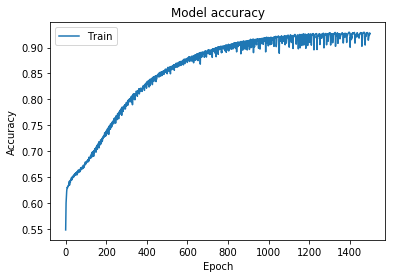

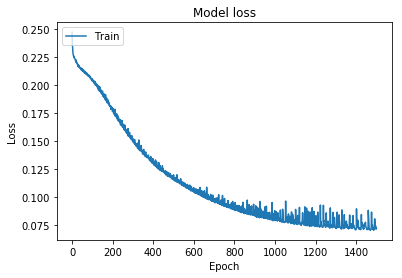

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()